Index(['date', 'HKCategoryValueSleepAnalysisAsleepCore',
       'HKCategoryValueSleepAnalysisAsleepDeep',
       'HKCategoryValueSleepAnalysisAsleepREM',
       'HKCategoryValueSleepAnalysisAsleepUnspecified',
       'HKCategoryValueSleepAnalysisAwake', 'total_sleep_hours'],
      dtype='object', name='sleep_type')
✅ Using 'total_sleep_hours' as sleep duration column.
Model R²: -0.126
RMSE: 3.80 hours

🧠 AI Sleep Recommendations:
 - Predicted sleep duration might drop. Try reducing screen time before bed.


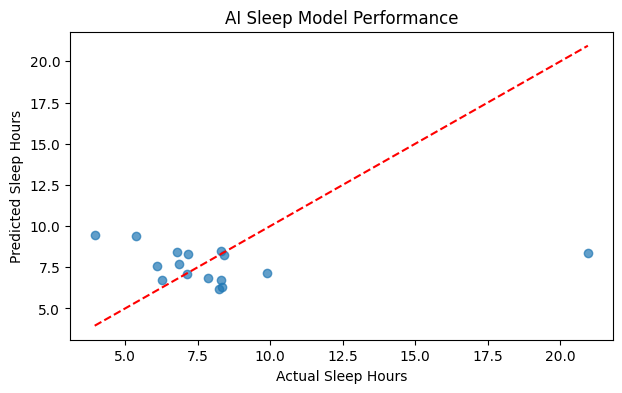

In [ ]:
import sys
import os

sys.path.append(os.path.abspath("../src"))

import importlib
import ai_sleep
importlib.reload(ai_sleep)

from ai_sleep import engineer_features, train_sleep_model, generate_recommendations

from parse_apple_health import parse_sleep_records
from sleep_analysis import summarize_sleep

sleep_df = parse_sleep_records("../data/export.xml")
daily_sleep = summarize_sleep(sleep_df)
print(daily_sleep.columns)
daily_sleep.head()

feature_df = engineer_features(daily_sleep, sleep_df)

model, X_test, y_test, preds = train_sleep_model(feature_df)

recs, pred_sleep = generate_recommendations(feature_df, model)

print("\n🧠 AI Sleep Recommendations:")
for r in recs:
    print(" -", r)

import matplotlib.pyplot as plt
plt.figure(figsize=(7,4))
plt.scatter(y_test, preds, alpha=0.7)
plt.xlabel("Actual Sleep Hours")
plt.ylabel("Predicted Sleep Hours")
plt.title("AI Sleep Model Performance")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()
